<a href="https://colab.research.google.com/github/stephenliu713/python_data-analysis/blob/main/02_pandas_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

所需文件: `data/supplier_data.csv`, `data/debt.xlsx`

# 0. pandas - 数据分析的神器
> Pandas是一个强大的分析结构化数据的工具集；它的使用基础是Numpy（提供高性能的矩阵运算）；用于数据挖掘和数据分析，同时也提供数据清洗功能。

pandas库是数据分析最常用也是功能最强大的一个库。由于篇幅所限，我们这里只展示pandas中的部分函数的部分功能，完整的函数和更多的功能请参考[pandas官方技术文档](https://pandas.pydata.org/docs/)

In [ ]:
import pandas as pd

# 1. pandas中的数据类型：`DataFrame`与`Series`

pandas中主要构建两种类型的数据：`Series`和`DataFrame`。

`DataFrame`简单理解就是一种panda格式的表格，它和我们平常看到的表格一样也有列、行、单元格等等。`Series`可以理解为只有一列的`DataFrame`。因此我们先重点来说`DataFrame`。

比起枯燥的概念，不如我们直接动手构建一个简单的`DataFrame`。

## 1.1 `DataFrame`的初始化

首先我们先来初始化一个简单的字典。

In [ ]:
dict_data = {'year': [1990, 1995, 2000, 2005 ],
             'gdp':[5.9, 7.6, 10.2, 13.0], 
             'cons':[3.8, 4.9, 6.8, 8.7]}
dict_data

{'cons': [3.8, 4.9, 6.8, 8.7],
 'gdp': [5.9, 7.6, 10.2, 13.0],
 'year': [1990, 1995, 2000, 2005]}

pandas可以将`dict`直接转化为`DataFrame`类型。其实你已经可以把这个字典想象成拥有3列4行的一张表，列名为`year`,`gdp`,`cons`。事实上pandas也确实是这么做的。

下面我们就来用一行代码初始化一个`DataFrame`。

In [ ]:
df_data = pd.DataFrame(dict_data)
df_data

,year,gdp,cons
0,1990,5.9,3.8
1,1995,7.6,4.9
2,2000,10.2,6.8
3,2005,13.0,8.7


你可以很简单的从这个表格中单独读取某一列。

In [ ]:
df_data['year']

0    1990
1    1995
2    2000
3    2005
Name: year, dtype: int64

当然，你也可以创建一个空`DataFrame`

In [ ]:
df1 = pd.DataFrame()
df1

""


不过更多时候，我们是用pandas从csv、Excel或其他格式的文件中读取`DataFrame`格式的数据（稍后讲到）

## 1.2 `DataFrame`的大小 `df.size`, `df.shape`

还是以刚才的gdp数据为例。这是一个3列4行的表格。

In [ ]:
df_data

,year,gdp,cons
0,1990,5.9,3.8
1,1995,7.6,4.9
2,2000,10.2,6.8
3,2005,13.0,8.7


我们用`df.shape`和`df.size`函数读取`df`的大小

In [ ]:
df_data.shape

(4, 3)

In [ ]:
df_data.size

12

## 1.3 `Series`与`DataFrame`

####区别：
* `Series`，只是一个一维数据结构，它由index和value组成。

* `DataFrame`，是一个二维结构，除了拥有index和value之外，还拥有column。

####联系：

* `DataFrame`由多个`Series`组成，无论是行还是列，单独拆分出来都是一个`Series`。


In [ ]:
df_data

,year,gdp,cons
0,1990,5.9,3.8
1,1995,7.6,4.9
2,2000,10.2,6.8
3,2005,13.0,8.7


In [ ]:
df_data['gdp']

0     5.9
1     7.6
2    10.2
3    13.0
Name: gdp, dtype: float64

In [ ]:
type(df_data)

pandas.core.frame.DataFrame

In [ ]:
type(df_data['gdp'])

pandas.core.series.Series

## 1.4 读取列名columns names与索引index `df.columns`,`df.index`

In [ ]:
df_data.columns

Index(['year', 'gdp', 'cons'], dtype='object')

In [ ]:
type(df_data.columns)

pandas.core.indexes.base.Index

In [ ]:
df_data.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
type(df_data.index)

pandas.core.indexes.range.RangeIndex

## 1.5 读取df各列的数据类型

In [ ]:
df_data.dtypes

year      int64
gdp     float64
cons    float64
dtype: object

## 1.6 读取多列 columns

我们可以一次读取多列，只要将目标列合并为一个list（相当于一个子集）。

In [ ]:
df_data[['year','gdp']]

,year,gdp
0,1990,5.9
1,1995,7.6
2,2000,10.2
3,2005,13.0


## 1.7 列 columns的重命名 `df.rename(columns={oldname:newname})`


In [ ]:
df_data_2 = df_data.rename(columns={'gdp':'gross domestic product'})
df_data_2

,year,gross domestic product,cons
0,1990,5.9,3.8
1,1995,7.6,4.9
2,2000,10.2,6.8
3,2005,13.0,8.7


In [ ]:
# 原来的df并没有改变
df_data

,year,gdp,cons
0,1990,5.9,3.8
1,1995,7.6,4.9
2,2000,10.2,6.8
3,2005,13.0,8.7


## 1.8 条件筛选 `df[df[column]==value]`

In [ ]:
df_data[df_data['year']==2000]

,year,gdp,cons
2,2000,10.2,6.8


In [ ]:
type(df_data[df_data['year']==2000])

pandas.core.frame.DataFrame

## 1.9 精确坐标筛选 `df.iloc[rowNum, colNum]`

你必须给出准确的数字坐标（或坐标范围）。

In [ ]:
# 读取第三行，所有列
df_data.iloc[2,:]

year    2000.0
gdp       10.2
cons       6.8
Name: 2, dtype: float64

In [ ]:
type(df_data[df_data['year']==2000])

pandas.core.frame.DataFrame

## 1.10 改变索引index `df.set_index(newIdx)`

pandas中默认的索引是从0开始的数字排序，但是你可以改变这一点——你可以选取一列或者多列（后续章节）作为索引index列。

In [ ]:
df_data_3 = df_data.set_index('year')
df_data_3

,gdp,cons
year,,
1990,5.9,3.8
1995,7.6,4.9
2000,10.2,6.8
2005,13.0,8.7


## 1.11 模糊坐标筛选 `df.loc[idxName]`

模糊坐标筛选不需要像`iloc`那样给出准确数字坐标。在使用某一列作为index列时，使用loc查找往往很方便。

In [ ]:
df_data_3.loc[2000]

gdp     10.2
cons     6.8
Name: 2000, dtype: float64

## 1.12 索引列index的重设 `df.reset_index()`

In [ ]:
df_data_3.reset_index()

,year,gdp,cons
0,1990,5.9,3.8
1,1995,7.6,4.9
2,2000,10.2,6.8
3,2005,13.0,8.7


## 1.13 行、列的删除 `df.drop(label,axis=0)`

`label`:需要删除的行/列，可以是单个值，也可以是一个列表

`axis`: 以列/行为基准进行删除: `index` -> 0, columns -> 1, 默认为0

In [ ]:
df_data.drop('year',axis=1)

,gdp,cons
0,5.9,3.8
1,7.6,4.9
2,10.2,6.8
3,13.0,8.7


In [ ]:
df_data.drop(2,axis=0)

,year,gdp,cons
0,1990,5.9,3.8
1,1995,7.6,4.9
3,2005,13.0,8.7


# 2. `DataFrame`的计算

## 2.1 简单四则运算
df支持在列于列之间直接对应进行+,-,*,/的四则运算

In [ ]:
df_data['cons_share'] = df_data['cons'] / df_data['gdp']
df_data

,year,gdp,cons,cons_share
0,1990,5.9,3.8,0.644068
1,1995,7.6,4.9,0.644737
2,2000,10.2,6.8,0.666667
3,2005,13.0,8.7,0.669231


In [ ]:
df_data['cons_share'] = df_data['cons_share'] * 100
df_data

,year,gdp,cons,cons_share
0,1990,5.9,3.8,64.406780
1,1995,7.6,4.9,64.473684
2,2000,10.2,6.8,66.666667
3,2005,13.0,8.7,66.923077


## 2.2 描述性统计 **`df.describe()`**(`sum`,`mean`, `var`, `std`, `skew`, `rank`, `quantile`, `mode`, `min`, `max`...)

`df.describe()`会给出df的描述性统计常用值。当然，你也可以分别输出它们。

In [ ]:
df_data.describe()

,year,gdp,cons,cons_share
count,4.000000,4.00000,4.000000,4.000000
mean,1997.500000,9.17500,6.050000,65.617552
std,6.454972,3.10309,2.157931,1.363750
min,1990.000000,5.90000,3.800000,64.406780
25%,1993.750000,7.17500,4.625000,64.456958
50%,1997.500000,8.90000,5.850000,65.570175
75%,2001.250000,10.90000,7.275000,66.730769
max,2005.000000,13.00000,8.700000,66.923077


In [ ]:
df_data.sum()

year          7990.000000
gdp             36.700000
cons            24.200000
cons_share     262.470207
dtype: float64

In [ ]:
df_data['gdp'].sum()

36.7

In [ ]:
df_data['gdp'].mean()

9.175

In [ ]:
df_data['gdp'].std()

3.1030898579748967

In [ ]:
df_data['gdp'].min()

5.9

In [ ]:
df_data['gdp'].max()

13.0

# 3. 读写文件

## 3.0 CSV文件
CSV（comma-separated value，逗号分隔值）文件格式是一种非常简单的**数据存储与分享格式**。

CSV 文件将数据表格存储为**纯文本**，表格（或电子表格）中的每个单元格都是一个数值或字符串。

*   Excel功能更强大
*   CSV读写更简单（因此对程序来说更友好）

主要区别：


*   CSV的单元格无法像Excel一样定义“类型”（数值、文本、货币、日期等）
*   CSV的单元格无法保存公式（其实是优点）





下面我们试着打开一份csv文件 `supplier_data.csv`

你可以用多种方式读取它

以txt打开：

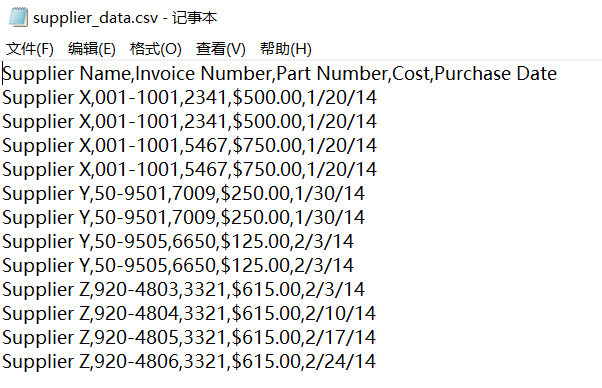


以Excel打开：

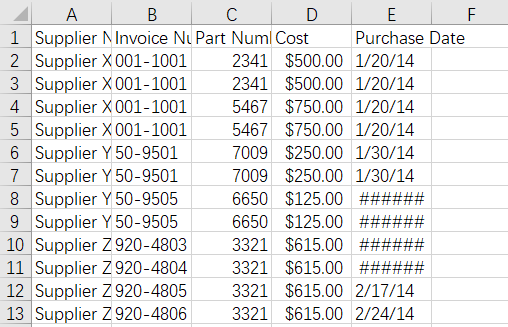


## 3.1 读取csv文件 `pd.read_csv(io)`

In [ ]:
df_supplier = pd.read_csv('data/supplier_data.csv')
# df.head(n) 展示数据开头（默认为5行）
df_supplier.head() 

,Supplier Name,Invoice Number,Part Number,Cost,Purchase Date
0,Supplier X,001-1001,2341,$500.00,1/20/14
1,Supplier X,001-1001,2341,$500.00,1/20/14
2,Supplier X,001-1001,5467,$750.00,1/20/14
3,Supplier X,001-1001,5467,$750.00,1/20/14
4,Supplier Y,50-9501,7009,$250.00,1/30/14


## 3.2 读取Excel文件 `pd.read_excel(io, header=0, sheet_name=0)`

对于Python来说，Excel文件往往比csv文件要“脏”一些。

以`data`文件夹中`debt.xlsx`为例，**许多Excel文件并不是只包含标准统一的数据表单**，它的开头数行要么是数据来源之类的文本，要么是空白。
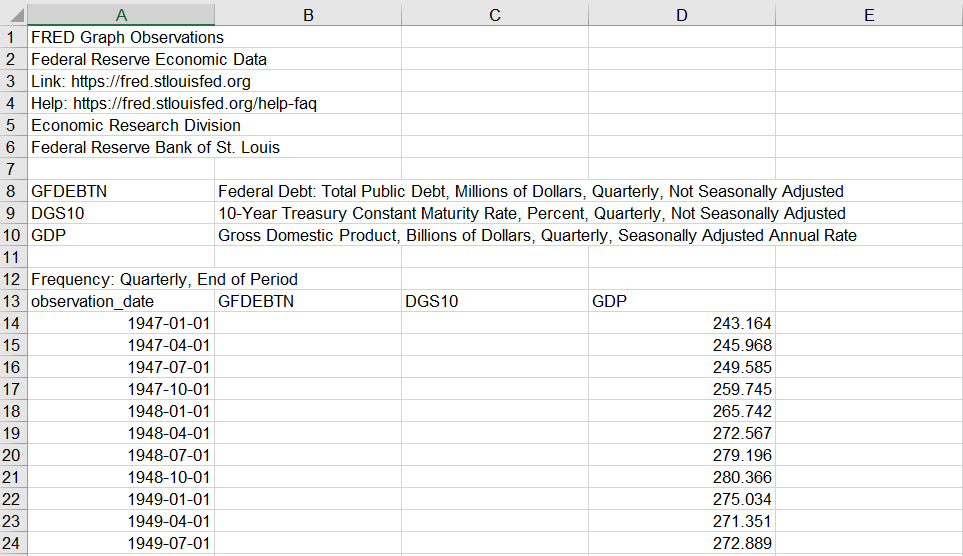

pandas当然也有读取excel的函数`read_excel`，我们试着读一下它。

In [ ]:
df_debt_0 = pd.read_excel('data/debt.xlsx')
df_debt_0

,FRED Graph Observations,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Federal Reserve Economic Data,NaN,NaN,NaN
1,Link: https://fred.stlouisfed.org,NaN,NaN,NaN
2,Help: https://fred.stlouisfed.org/help-faq,NaN,NaN,NaN
3,Economic Research Division,NaN,NaN,NaN
4,Federal Reserve Bank of St. Louis,NaN,NaN,NaN
...,...,...,...,...
97,2014-01-01 00:00:00,17521.7,17799837,2.53956
98,2015-01-01 00:00:00,18219.3,1.83442e+07,2.13829
99,2016-01-01 00:00:00,18707.2,1.95492e+07,1.83744
100,2017-01-01 00:00:00,19485.4,2.01072e+07,2.32948


你可以看到，默认的读取方式使得错误的行成为了columns行，这让我们的df看起来非常混乱。

因此，读取Excel文件时，**我们往往需要定义数据起始列`header`**。考虑到一份Excel文件里还可能存在多张表单sheet，**我们最好还要定义`sheet_name`**。

In [ ]:
df_debt = pd.read_excel('data/debt.xlsx',
                        header = 12,
                        sheet_name = 'quarterly')
df_debt.head()

,observation_date,GFDEBTN,DGS10,GDP
0,1947-01-01,NaN,NaN,243.164
1,1947-04-01,NaN,NaN,245.968
2,1947-07-01,NaN,NaN,249.585
3,1947-10-01,NaN,NaN,259.745
4,1948-01-01,NaN,NaN,265.742


`usecols`参数可以帮你筛选你想要的列。

In [ ]:
df_debt_1 = pd.read_excel('data/debt.xlsx',
                        header = 12,
                        sheet_name = 'quarterly',
                        usecols = [0,3])
df_debt_1.head()

,observation_date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


## 3.3 目录 io

Python**默认的读取目录是程序文件所在的根目录**。

也就是说，如果你将`test.csv`和程序文件放在同一个文件夹里，你只需要输入`pd.read_csv('test.csv')`，程序就能识别到你的文件。

但是，现实情况往往不是这样的。**也许目录在上一层文件夹里、电脑中别的文件夹里或者是云端的某个地方，又或者这个路径是随着日期而变化的。**这时候，我们可以借助`os`库来完成路径读取的自动化。`os`库是python的一个标准库，它主要包含与操作系统（operating system）相关的一些函数。



In [ ]:
import os

## 3.3.1 相对路径与绝对路径


*   **相对路径**：相对程序文件而言的路径。例如 `data/debt.xlsx`
*   **绝对路径**：计算机中的路径。例如`D:/Python/data/debt.xlsx`


（由于我们是在云端运行的代码，因此路径看起来和常见的计算机本地路径不同。）

In [ ]:
# 获取当前目录
os.getcwd()

'/content'

In [ ]:
# 获取上一级目录
os.path.abspath(os.path.dirname(os.getcwd()))

'/'